# ESCI 445 - Programming Exercise 4-2

### Modeling the 1D Advection Equation Using the Forward-in-time, Backward-in-space Scheme

Variables

+ nx: number of x data points
+ ny: number of y data points
+ dx: $\Delta x$, spacing between data points (meters)
+ dt: $\Delta t$, time interval (seconds)
+ c: speed of advection (either wind speed or wave speed)
+ u: parameter being advected
+ u_now: value of <i>u</i> at current time step
+ u_new: value of <i>u</i> at next time step

The 1D advection equation is $\dfrac{\partial u}{\partial t}+c\dfrac{\partial u} {\partial x}=0$.  This notebook will show the steps for how to model this equation using the forward-in-time, backward-in-space scheme for positive values of <i>c</i>.

### Import libraries

In [54]:
import numpy as np   # Import numerical python aliased to np
import matplotlib.pyplot as plt  # Import matplotlib pyplot aliased to plt
from matplotlib import rcParams

### Define fixed model parameters

In [55]:
dx = 1e3  #  Grid spacing in meters
dt = 30.0  # Time interval in seconds
nx = 601   #  Number of grid points
n_total = 500  # Final time index at end of simulation
n_save = 10   #  Number of iterations between saves
x = np.arange(0,nx)*dx/1000.0  #  Grid values (in kilometers)

### Define user-specified model parameters

In [56]:
width = 20   #  Signal width in grid points
c =  -15.0   # Speed of wave in meters per second

### Define arrays holding the solution values

In [57]:
u_now = np.zeros(nx, dtype = np.float_)  #  Value at current time step
u_next = np.zeros_like(u_now)  #  Value at next time step
u = np.zeros((0, nx), dtype = np.float_)  # define a variable to hold the output values

### Initialize the solution at time zero.

In [58]:
Gaussian = False  # If true, initial data is Gaussian.  Otherwise, it is rectangel

if Gaussian:
    std = 6.0  # number of gridpoints for standard deviation
    arg = ((nx/2-np.arange(0,nx))**2)/(4*std**2)
    u_now[0:nx] = np.exp(-arg)
else:
    width = 20   #  Signal width
    start, stop = int(nx/2) - int(width/2), int(nx/2) + int(width/2)
    u_now[start:stop] = 1.0

u = np.vstack((u, u_now))    #  Saves initial data for output

### <font color = 'blue'>Main loop over time, with nested loop over grid

In [59]:
sigma = c*dt/dx  # Defined here so it isn't in the loop

for n in range(0, n_total): # start of time loop
    
    # Write your code here to loop through the grid
    for i in range(0,nx-1):
        u_next[i] = u_now[i] - sigma * (u_now[i+1] - u_now[i])

    #Swap the vars
    u_now = np.copy(u_next)

    # Prints out amplitude of signal
    print(n+1, np.max(abs(u_now)))
    
    # Save output
    if (n+1) % n_save == 0:
        u = np.vstack((u, u_now))

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 0.999999884055
21 0.999998608666
22 0.99999740441
23 0.999994631906
24 0.99998578014
25 0.999983061569
26 0.999958855768
27 0.999955270614
28 0.99992267095
29 0.999898397214
30 0.999862491844
31 0.999795704142
32 0.999766765235
33 0.999627434307
34 0.999621379487
35 0.99945708511
36 0.999410236288
37 0.999249571629
38 0.999115956662
39 0.998978802329
40 0.998720609548
41 0.998631116299
42 0.998206385769
43 0.998192325285
44 0.997760650693
45 0.997648187812
46 0.997266939684
47 0.996984828669
48 0.996682448934
49 0.99618908746
50 0.99599571991
51 0.995248791018
52 0.995195678438
53 0.994417209012
54 0.994271867643
55 0.993609074951
56 0.993214628852
57 0.992697083418
58 0.992015233498
59 0.99167248881
60 0.990665970995
61 0.990527204694
62 0.989368416822
63 0.989253896766
64 0.98827832851
65 0.987846045285
66 0.987080213273
67 0.986297981106
68 0.985767586372
69

### Save output file for later use.  Output can be viewed separately using the program View-1D.py

In [60]:
np.save('fit-bis', u) # Saves output as NumPy array file

### Plot output

<IPython.core.display.Javascript object>


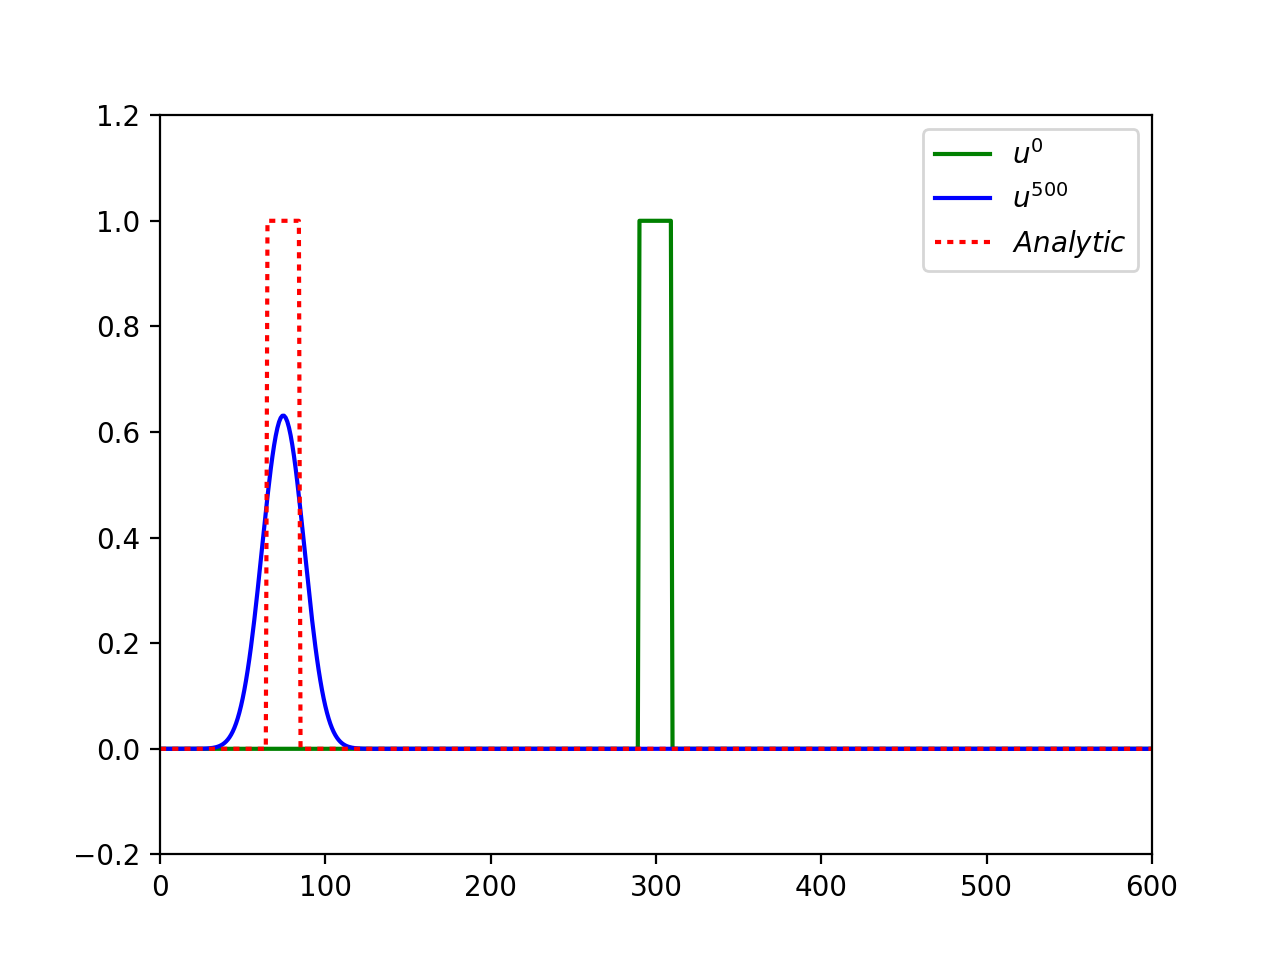

In [61]:
inline = True  # True for inline plot, False for interactive
if inline:
    %matplotlib notebook
else:
    %matplotlib
    
s = r'$u^{' + str(n_total) + r'}$'
plt.plot(x, u[0,:], 'g-',label = r'$u^0$')
plt.plot(x, u[-1,:], 'b-',label = s)
plt.xlim(x[0],x[-1])
umin, umax = np.min(u), np.max(u)
plt.ylim(umin-0.2, umax+0.2)

# Create actual solution for comparison
displacement = c*dt*n_total  # distance signal is displaced
nindex = int(displacement/dx)  # number of grid points signal is displaced
plt.plot(x, np.roll(u[0,:], nindex), 'r:', label = r'$Analytic$')

plt.legend((r'$u^0$', s, r'$Analytic$'), loc = 0)
plt.show()